# Robinson Retail Holdings Stock Prediction
#### 1. Data Gathering
The dataset was acquired from **ph.investing.com**; with a date ranging of two years: from October 10, 2021 to October 10, 2022 at this time of programming.
Listed below are the libraries needed for this project:

In [2]:
import pandas as pd                                                    #Used for manipulating the dataset
from tensorflow.keras.models import Sequential                         #Used for model construction
from tensorflow.keras.layers import Dense, Dropout, LSTM               #Used for defining the layers of the model; SInce I'm assigned to LSTM, I'll be using LSTM.
from sklearn.preprocessing import MinMaxScaler                         #Used for preprocessing the dataset
import numpy as np                                                     #Used for manipulating the dataset
import matplotlib.pyplot as plt                                        #Used for comparison/evaluation of the model
import pickle

#### 2. Preprocessing Data
The chosen feature to predict in this project is the **Close** or the **Final Price** 

In [3]:
stock = pd.read_csv("C:\\Users\\Dingus-Elite\\Downloads\\RRHI Historical Data Complete.csv") #Acquire the .csv file; 

In [4]:
stock #Checking the contents of the dataset

,Date,Price,Open,High,Low,Vol.,Change %
0,10/10/2022,54.80,53.80,55.00,53.80,83.51K,-0.36%
1,10/07/2022,55.00,54.50,55.00,53.65,49.01K,2.52%
2,10/06/2022,53.65,55.40,55.40,53.65,233.26K,-3.33%
3,10/05/2022,55.50,55.50,56.45,54.60,373.36K,1.83%
4,10/04/2022,54.50,54.55,55.50,54.40,717.19K,0.09%
...,...,...,...,...,...,...,...
486,10/16/2020,65.50,66.00,67.00,65.50,617.62K,-2.60%
487,10/15/2020,67.25,66.80,67.25,65.30,112.96K,0.37%
488,10/14/2020,67.00,66.30,67.00,66.20,61.18K,1.06%
489,10/13/2020,66.30,65.00,67.00,65.00,263.78K,3.19%


In [5]:
stock_price = stock.iloc[:,1:2]                                            #Select only the "price" column
stock_to_train = stock_price[:444]                                         #Training data is only 90% of the dataset
stock_to_test = stock_price[444:]                                          #Testing data is the remaining 10%

stock_price_train = stock_price.iloc[:444,:].values                        #Acquire the values from the given range
stock_price_test = stock_price.iloc[444:,:].values
scaler = MinMaxScaler(feature_range=(0,1))                                 #Scales the acquired values from "Price" Column to between 0 and 1.
scaled_training = scaler.fit_transform(stock_price_train)                  #fits the scaled training data

In [6]:
X_train=[]
y_train=[]

for i in range(65,444):
    X_train.append(scaled_training[i-65:i, 0])                             #Appends the previous 65 day scaled values of "Price"
    y_train.append(scaled_training[i, 0])
    
X_train, y_train= np.array(X_train), np.array(y_train)                     #Converts the python list into a Numpy array in order to be processed by the model
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))         #Converts the training data into 3 dimensions.

In [7]:
y_train.shape

(379,)

#### 3. Choosing a Model
As part of the constraints, I'm assigned to using only LSTM.

#### 4. Training
The prepared datasets earlier are fed into the model.

In [9]:
#  Initialising the RNN

model= Sequential()                                                                                         #Defines a model to be Sequential
model.add(LSTM(units=175,return_sequences=True, input_shape=(X_train.shape[1],1),recurrent_dropout=0.2))    #Inputs the dimensions of the training data, adds a dropout of 20%
model.add(LSTM(units=175,return_sequences=True,recurrent_dropout=0.2))                                      #return_sequences means passing the data to the next layer.
model.add(LSTM(units=200,return_sequences=True,recurrent_dropout=0.3))
model.add(LSTM(units=175,return_sequences=True,recurrent_dropout=0.3))
model.add(LSTM(units=175,recurrent_dropout=0.3))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

history=model.fit(X_train,y_train,epochs=100,batch_size=32)                                                 #Fits the previously processed models, epochs set at 100.

Epoch 1/100
12/12 [==============================] - 15s 617ms/step - loss: 0.0884
Epoch 2/100
12/12 [==============================] - 8s 655ms/step - loss: 0.0399
Epoch 3/100
12/12 [==============================] - 8s 678ms/step - loss: 0.0322
Epoch 4/100
12/12 [==============================] - 8s 696ms/step - loss: 0.0249
Epoch 5/100
12/12 [==============================] - 8s 643ms/step - loss: 0.0196
Epoch 6/100
12/12 [==============================] - 8s 651ms/step - loss: 0.0177
Epoch 7/100
12/12 [==============================] - 7s 613ms/step - loss: 0.0155
Epoch 8/100
12/12 [==============================] - 8s 640ms/step - loss: 0.0148
Epoch 9/100
12/12 [==============================] - 8s 626ms/step - loss: 0.0143
Epoch 10/100
12/12 [==============================] - 8s 671ms/step - loss: 0.0143
Epoch 11/100
12/12 [==============================] - 8s 641ms/step - loss: 0.0142
Epoch 12/100
12/12 [==============================] - 8s 627ms/step - loss: 0.0173
Epoch 13/100

#### 5. Evaluation
To evaluate my model, I used matplotlib and assessed how their trends differ.

In [10]:
data_all = pd.concat([stock_to_train['Price'], stock_to_test['Price']],  axis=0)                            #Combines the training and testing data
inputs = data_all[len(data_all)-len(stock_to_test)-65:].values                                              #Acquires the values of the training data and the 65 day prior data
inputs = inputs.reshape(-1,1) 
inputs = scaler.transform(inputs)
X_test = []

for i in range(65, len(inputs)):                                                      
    X_test.append(inputs[i-65:i, 0])                                                                        #Appends the values acquired from the scaled "inputs"
    
X_test = np.array(X_test)                                                                                   #Converts python list into numpy array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))                                          #Reshapes the acquired numpy array into 3 dimensions.
real_price_test = stock_price_test[:, 0:1]                                                                  #Defines the real stock price; for compaarison purposes

2/2 [==============================] - 1s 67ms/step


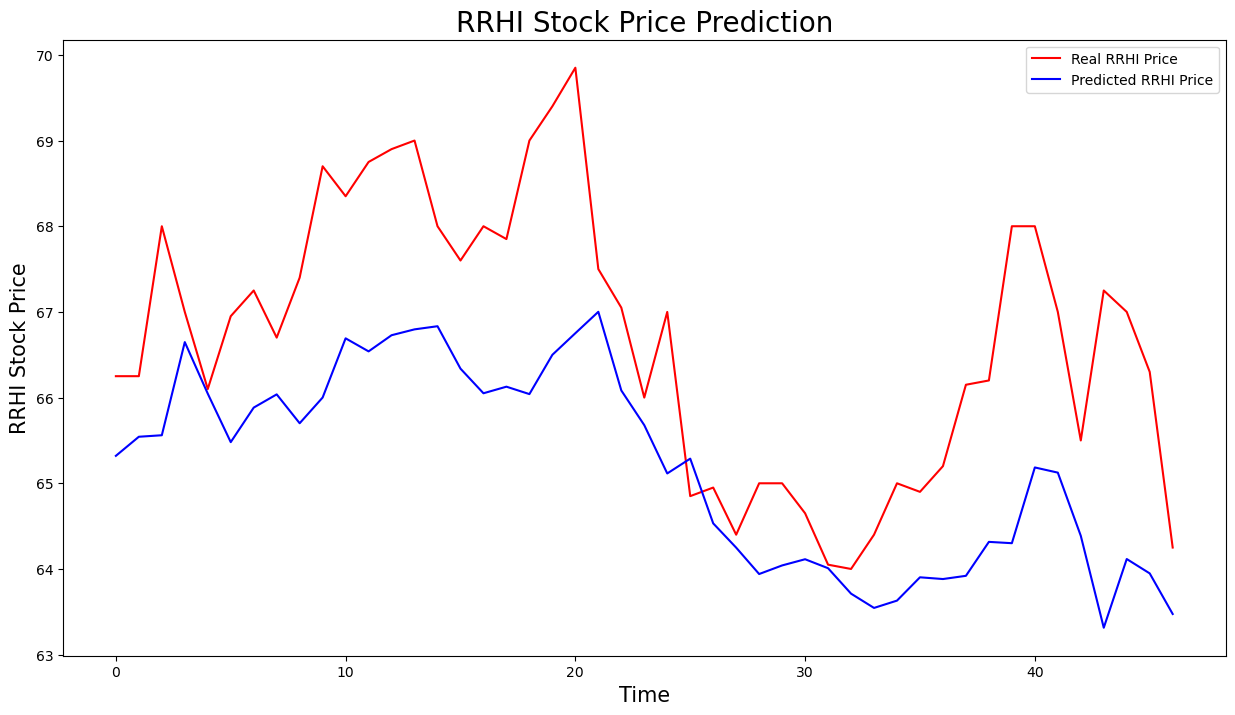

In [11]:
pred_stock = model.predict(X_test)                                                                          #Uses the defined model to predict the next values or "price"
pred_stock = scaler.inverse_transform(pred_stock)                                                           #Reverts the model's scaled output (of 0 to 1) back to actual values.
plt.figure(figsize=(15,8))                                                                                  #Compares the model's prediction to the actual stock price
plt.plot(real_price_test, color='Red', label='Real RRHI Price')
plt.plot(pred_stock, color='Blue', label='Predicted RRHI Price')
plt.title('RRHI Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('RRHI Stock Price',fontsize=15)
plt.legend()
plt.show()

#### 6. Hyperparameter Tuning
Ther are two modifications made in the Models Layer
1. The Units: these originally staarted from 50; however, as training went on, these rose to 175 and 200; each layer was individually modified to produce optimal results.
2. The Dropout: Upon further reading, using recurrent dropouts work better than individual dropout layers; these were originally set to 0.2; but some were changed to 0.3
3. Amount of Layers: I started with 5 layers, and decided to increase the layers, but they yield poor results; eventually, it was reverted back to 5 layers.
4. number of epochs: Originally it was set to 100; it was then later changed to 250; but the improvements are not worth the training time; it was then reverted back to 100.

#### 7. Prediction
We then feed the model with a recent dataset.

In [12]:
data_all = pd.read_csv("C:\\Users\\Dingus-Elite\\Downloads\\RRHI Historical Data (1).csv")                   #Calls recent dataset          
data_all = data_all.iloc[:,1:2]                                                                              #Selects the "Price" Column 
inputs = data_all[0:-65].values                                                                              #Inputs all the values of the previous 65 days in the dataset
inputs = inputs.reshape(-1,1) 
inputs = scaler.transform(inputs)                                                                            #Scales the data to between 0 and 1
X_test = []

for i in range(65, len(inputs)):
    X_test.append(inputs[i-65:i,0])                                                                          #Passes the scaled values to a Python list

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))                                           #Converts python list into a 3D Numpy Array
pred_stock = model.predict(X_test)                                                                           #Passes the data to the model
pred_stock = scaler.inverse_transform(pred_stock)                                                            #Reverts the scaled values back to real world values
pred_stock = pred_stock[0:7]                                                                                 #Selects the 1st 7Day forecast
                       
prediction_test_out = pd.DataFrame(pred_stock, columns=['Forecasted Values']).to_csv("C:\\Users\\Dingus-Elite\\Desktop\\billones_rrhi_forecast.csv") #Writes a .csv file containing the forecast.

4/4 [==============================] - 0s 105ms/step


In [16]:
model.save("stock_model_keras.h5")